In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [18]:
pd.set_option('display.width', 800)
pd.set_option('display.max_columns', 9)

In [5]:
data = pd.read_csv('E:/Besha/belajar/pandas exercise/exercise 3/vgsales.csv')

In [19]:
print(data.head())

   Rank                      Name Platform    Year  ... EU_Sales JP_Sales  Other_Sales  Global_Sales
0     1                Wii Sports      Wii  2006.0  ...    29.02     3.77         8.46         82.74
1     2         Super Mario Bros.      NES  1985.0  ...     3.58     6.81         0.77         40.24
2     3            Mario Kart Wii      Wii  2008.0  ...    12.88     3.79         3.31         35.82
3     4         Wii Sports Resort      Wii  2009.0  ...    11.01     3.28         2.96         33.00
4     5  Pokemon Red/Pokemon Blue       GB  1996.0  ...     8.89    10.22         1.00         31.37

[5 rows x 11 columns]


In [20]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.1+ MB
None


In [21]:
print(data.isnull().sum())

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64


In [22]:
data.dropna(inplace=True)
print(data.isnull().sum())

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16291 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16291 non-null  int64  
 1   Name          16291 non-null  object 
 2   Platform      16291 non-null  object 
 3   Year          16291 non-null  float64
 4   Genre         16291 non-null  object 
 5   Publisher     16291 non-null  object 
 6   NA_Sales      16291 non-null  float64
 7   EU_Sales      16291 non-null  float64
 8   JP_Sales      16291 non-null  float64
 9   Other_Sales   16291 non-null  float64
 10  Global_Sales  16291 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.2+ MB


<AxesSubplot:>

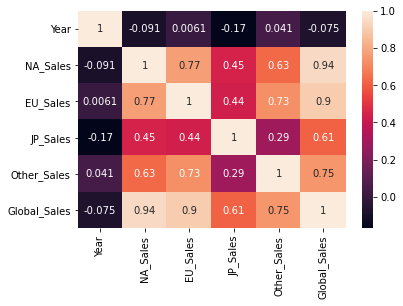

In [25]:
datacorr = data[['Year', 'NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales']]
sns.heatmap(datacorr.corr(), annot=True)

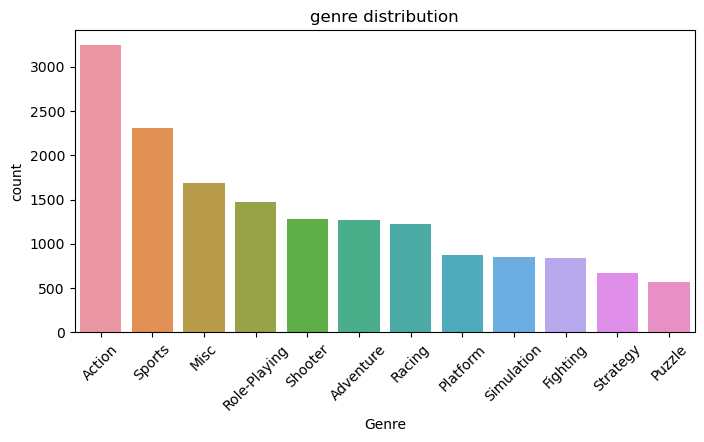

In [43]:
plt.figure(figsize=(8,4), dpi=100)
sns.countplot(x='Genre', data=data, order=data['Genre'].value_counts().index)
plt.title('genre distribution')
plt.xticks(rotation=45)
plt.show()

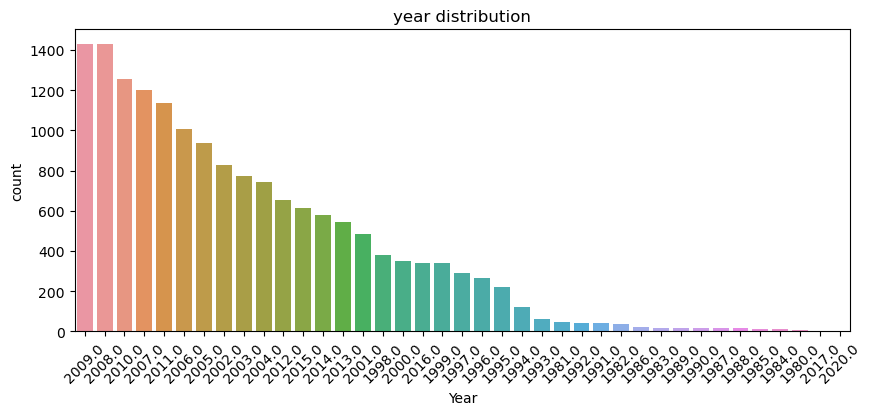

In [45]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(x='Year', data=data, order=data['Year'].value_counts().index)
plt.title('year distribution')
plt.xticks(rotation=45)
plt.show()

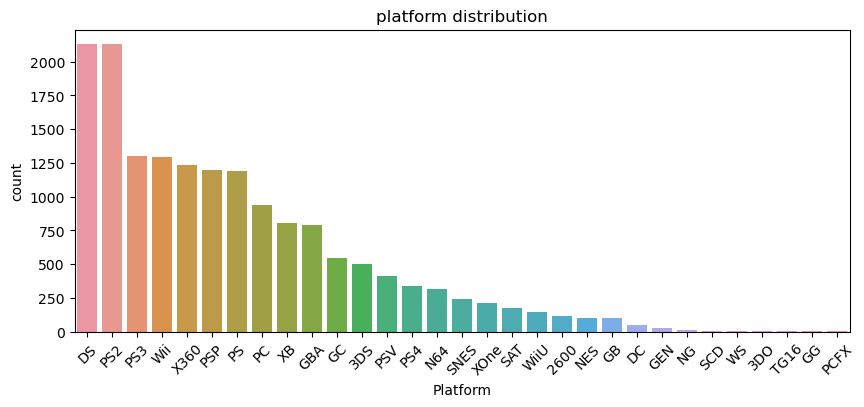

In [46]:
plt.figure(figsize=(10,4), dpi=100)
sns.countplot(x='Platform', data=data, order=data['Platform'].value_counts().index)
plt.title('platform distribution')
plt.xticks(rotation=45)
plt.show()

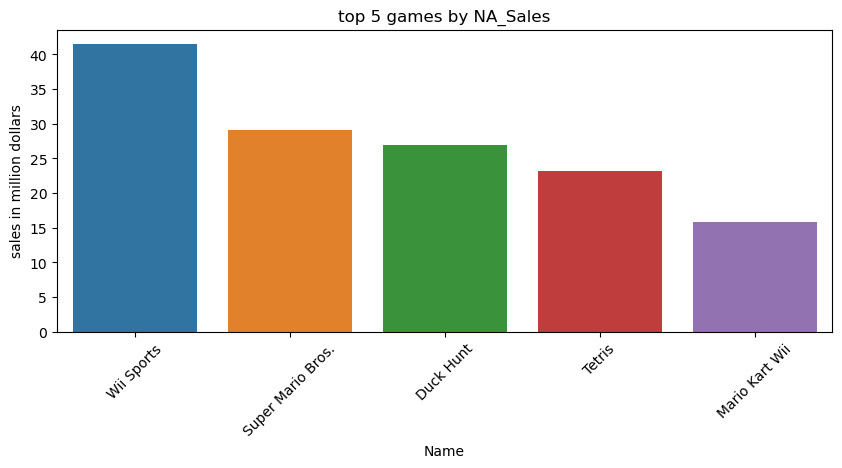

In [50]:
plt.figure(figsize=(10,4), dpi=100)
topnasales = data.sort_values(by='NA_Sales', ascending=False).head()
sns.barplot(x='Name', y='NA_Sales', data=topnasales)
plt.title('top 5 games by NA_Sales')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

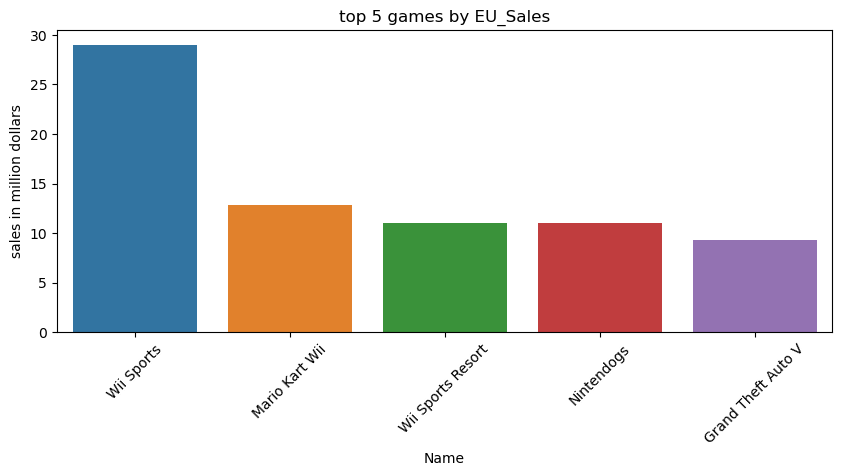

In [51]:
plt.figure(figsize=(10,4), dpi=100)
topeusales = data.sort_values(by='EU_Sales', ascending=False).head()
sns.barplot(x='Name', y='EU_Sales', data=topeusales)
plt.title('top 5 games by EU_Sales')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

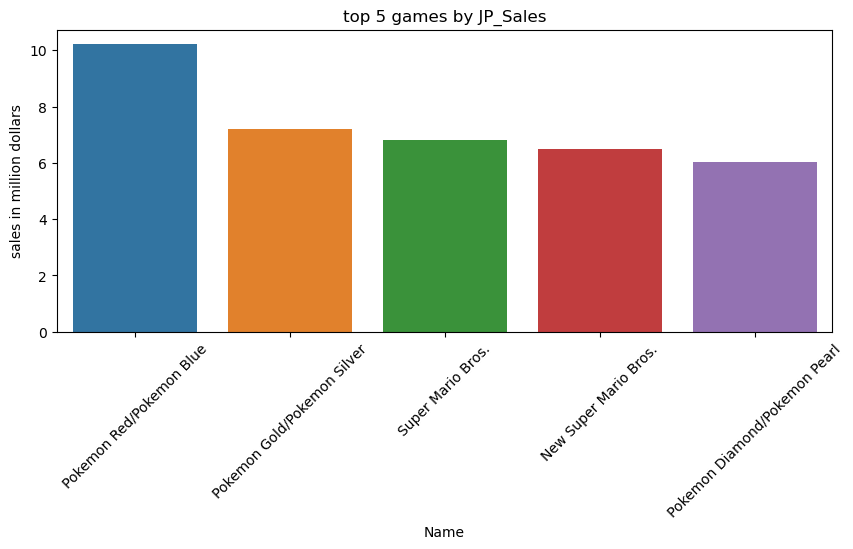

In [52]:
plt.figure(figsize=(10,4), dpi=100)
topjpsales = data.sort_values(by='JP_Sales', ascending=False).head()
sns.barplot(x='Name', y='JP_Sales', data=topjpsales)
plt.title('top 5 games by JP_Sales')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

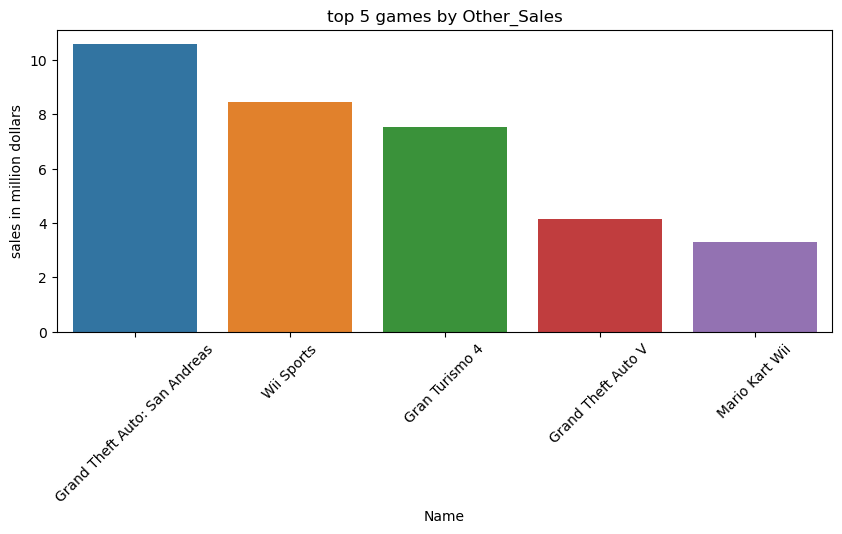

In [53]:
plt.figure(figsize=(10,4), dpi=100)
topothsales = data.sort_values(by='Other_Sales', ascending=False).head()
sns.barplot(x='Name', y='Other_Sales', data=topothsales)
plt.title('top 5 games by Other_Sales')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

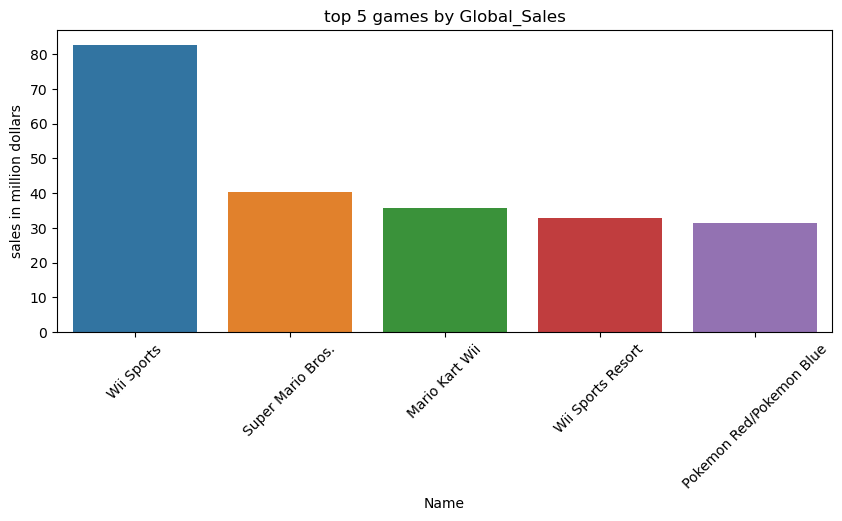

In [54]:
plt.figure(figsize=(10,4), dpi=100)
topglsales = data.sort_values(by='Global_Sales', ascending=False).head()
sns.barplot(x='Name', y='Global_Sales', data=topglsales)
plt.title('top 5 games by Global_Sales')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

In [71]:
mostgenreeachyear = data.groupby(['Year', 'Genre']).size().reset_index().sort_values(by=0, ascending=False).drop_duplicates(subset='Year', keep='first').reset_index(drop=True)
mostgenreeachyear.rename(columns={0:'counts'}, inplace=True)
print(mostgenreeachyear.head())

     Year   Genre  counts
0  2009.0  Action     272
1  2012.0  Action     265
2  2015.0  Action     255
3  2011.0  Action     239
4  2010.0  Action     226


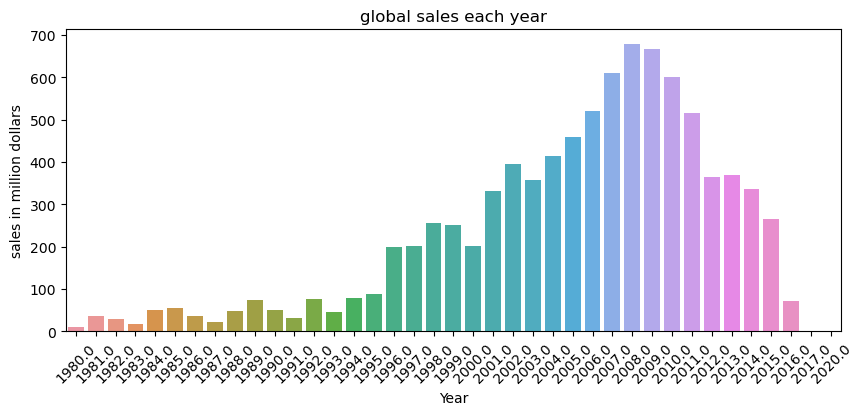

In [66]:
globalsalesyear = data.groupby('Year')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x='Year', y='Global_Sales', data=globalsalesyear)
plt.title('global sales each year')
plt.ylabel('sales in million dollars')
plt.xticks(rotation=45)
plt.show()

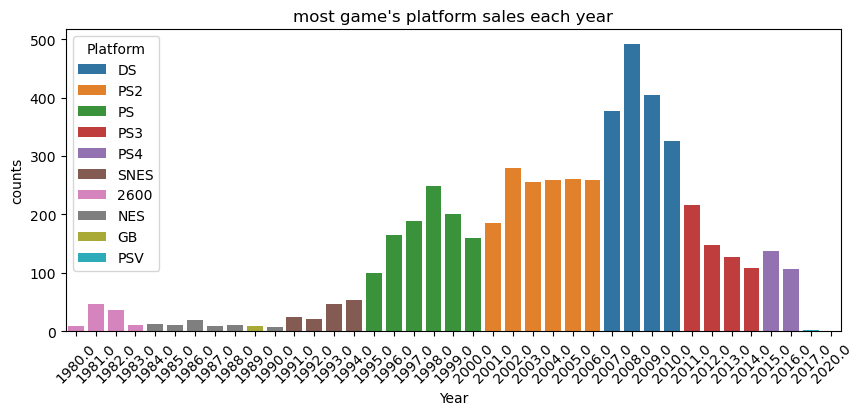

In [79]:
mostplateachyear = data.groupby(['Year', 'Platform']).size().reset_index().sort_values(by=0, ascending=False).drop_duplicates(subset='Year', keep='first')
mostplateachyear.rename(columns={0:'counts'}, inplace=True)
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x='Year', y='counts', data=mostplateachyear, hue='Platform', dodge=False)
plt.title("most game's platform sales each year")
plt.xticks(rotation=45)
plt.show()

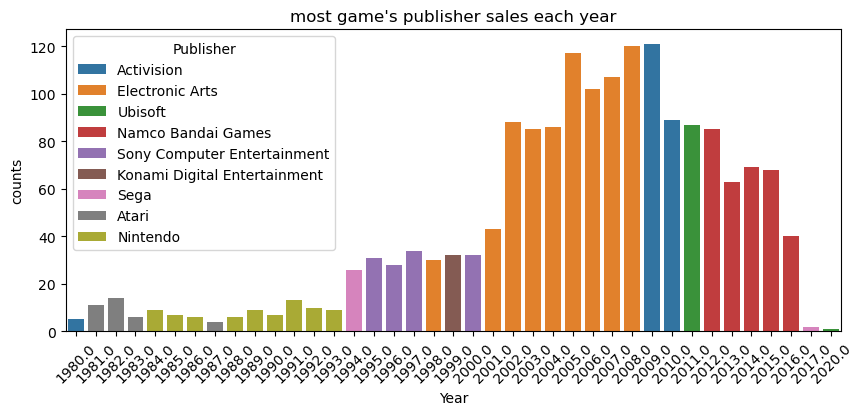

In [78]:
pubyear = data.groupby(['Year', 'Publisher']).size().sort_values(ascending=False).reset_index().drop_duplicates(subset='Year', keep='first')
pubyear.rename(columns={0:'counts'}, inplace=True)
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x='Year', y='counts', data=pubyear, hue='Publisher', dodge=False)
plt.title("most game's publisher sales each year")
plt.xticks(rotation=45)
plt.show()

<ipython-input-81-8c1fd0586b67>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  salescomparegenre = data.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()


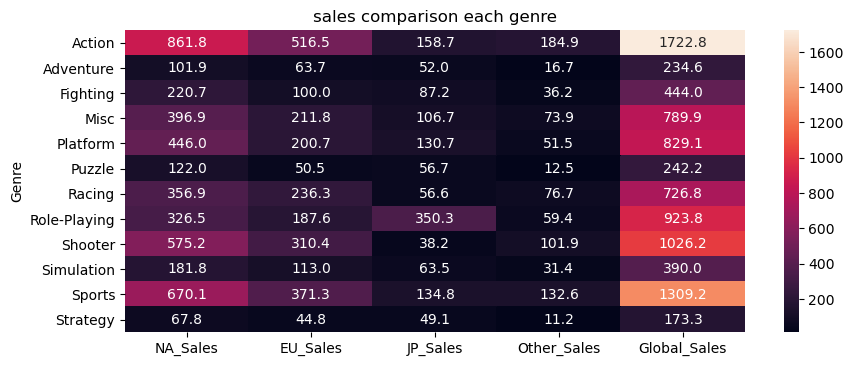

In [81]:
salescomparegenre = data.groupby('Genre')['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales', 'Global_Sales'].sum()
plt.figure(figsize=(10,4), dpi=100)
sns.heatmap(salescomparegenre, annot=True, fmt='.1f')
plt.title('sales comparison each genre')
plt.show()

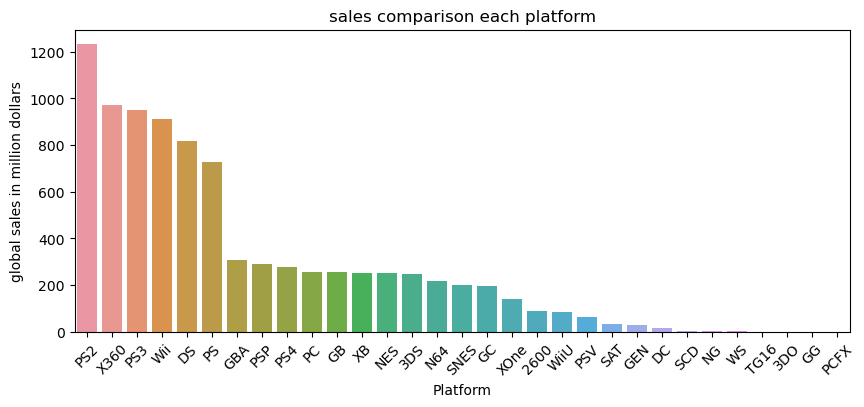

In [83]:
salescompareplatform = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,4), dpi=100)
sns.barplot(x='Platform', y='Global_Sales', data=salescompareplatform)
plt.title('sales comparison each platform')
plt.ylabel('global sales in million dollars')
plt.xticks(rotation=45)
plt.show()